# Create a database to later apply ML

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
params = { 'axes.grid': True
          ,'axes.axisbelow': True
          ,'grid.color': '0.5'
          ,'legend.numpoints': 1
          ,'savefig.bbox': 'tight'
          ,'font.size': 16
          ,'legend.loc': 'best'
          ,'legend.fontsize': 'medium'
          #,'lines.markersize': 6
          ,'xtick.labelsize': 'small'
          ,'ytick.labelsize': 'small'
          #,'xtick.direction': 'out'
          #,'ytick.direction': 'out'
          #,'text.usetex': False
          ,'figure.figsize': [8, 6]
          #,'axes.labelsize': 'large'   # no need to change these sizes, just change font.size
          #,'axes.titlesize': 'x-large'
}
plt.rcParams.update(params)

# Get all data related to the counties

In [3]:
census_df= pd.read_csv('corrected/Census_byCounty.csv')

In [4]:
risk_df= pd.read_csv('corrected/RiskFactors_byCounty.csv')
paysource_df= pd.read_csv('corrected/PaymentSources_byCounty.csv')
radon_df= pd.read_csv('corrected/RadonZones_byCounty.csv')
traffic_df= pd.read_csv('corrected/TrafficPopulation_byCounty.csv')

In [5]:
temp= pd.merge(risk_df,paysource_df,on='County')
temp= pd.merge(temp,radon_df,on='County')
temp= pd.merge(temp,traffic_df,on='County')

county_df= pd.merge(census_df,temp,on='County')

In [6]:
import json

In [7]:
county_names= np.array(county_df['County'])
county_df

,County,Population,Persons under 5 years percent,Persons under 18 years percent,Persons 65 years and over percent,Female persons percent,White alone percent,Black or African American alone percent,American Indian and Alaska Native alone percent,Asian alone percent,...,Adult smokers (%),Second-hand smoke (%),Adult obese (%),Unemployment (%),Medicare (%),Medi-Cal (%),Private (%),Other (%),Radon Zone,Population near busy roads (%)
0,Alameda,1638215,6.0,21.1,12.7,50.9,51.3,11.8,1.1,29.5,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.90,2,71.7
1,Alpine,1110,2.6,19.2,22.0,47.4,72.1,0.5,23.2,1.2,...,16.9,8.0,18.7,14.0,NaN,NaN,NaN,NaN,2,0.0
2,Amador,37001,3.6,15.3,25.8,46.7,90.6,2.2,2.3,1.5,...,16.9,8.0,18.7,11.7,28.19,23.35,40.97,7.49,2,6.8
3,Butte,225411,5.4,20.1,17.5,50.5,86.5,1.8,2.5,4.7,...,16.7,14.5,23.8,12.5,18.10,56.85,16.97,8.08,3,31.2
4,Calaveras,44828,3.9,17.4,25.9,50.0,91.7,1.0,1.9,1.6,...,16.9,8.0,18.7,14.1,22.82,45.63,22.82,8.74,2,3.4
5,Colusa,21482,7.2,27.7,13.4,48.7,91.3,1.2,2.6,1.9,...,15.1,3.9,38.2,18.3,14.13,54.35,21.74,9.78,3,10.0
6,Contra Costa,1126745,5.8,23.2,14.6,51.2,66.8,9.6,1.0,16.8,...,10.6,6.2,24.0,10.3,19.28,37.27,32.04,11.41,2,49.9
7,Del Norte,27254,5.7,21.0,16.3,45.2,78.7,3.5,9.1,3.6,...,15.2,11.5,31.4,12.2,9.23,70.00,12.31,8.46,3,8.0
8,El Dorado,184452,4.3,20.6,18.6,49.9,89.6,1.0,1.3,4.2,...,11.5,4.2,22.9,11.3,14.59,30.02,38.81,16.58,2,17.6
9,Fresno,974861,8.2,28.7,11.5,50.1,77.2,5.9,3.0,10.7,...,13.9,6.5,30.0,15.1,8.87,69.13,15.51,6.49,2,49.6


In [8]:
county_df.describe()

,Population,Persons under 5 years percent,Persons under 18 years percent,Persons 65 years and over percent,Female persons percent,White alone percent,Black or African American alone percent,American Indian and Alaska Native alone percent,Asian alone percent,Native Hawaiian and Other Pacific Islander alone percent,...,Adult smokers (%),Second-hand smoke (%),Adult obese (%),Unemployment (%),Medicare (%),Medi-Cal (%),Private (%),Other (%),Radon Zone,Population near busy roads (%)
count,5.800000e+01,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,...,58.000000,58.000000,58.000000,58.000000,57.000000,57.000000,57.000000,57.000000,58.000000,58.000000
mean,6.749107e+05,5.912069,22.325862,16.491379,49.520690,81.417241,3.563793,3.141379,7.643103,0.396552,...,14.313793,6.565517,26.679310,12.791379,17.734561,45.815439,25.561579,10.887895,2.431034,30.524138
std,1.477043e+06,1.397250,4.188688,4.974401,2.178021,10.357083,3.251596,3.370358,8.419112,0.288958,...,4.005630,2.813723,7.521496,3.394902,9.449188,13.062651,10.387338,4.580757,0.565439,22.496560
min,1.110000e+03,2.600000,13.400000,9.400000,36.900000,51.300000,0.400000,0.800000,0.500000,0.000000,...,5.500000,2.700000,11.300000,7.800000,6.120000,14.290000,10.000000,0.000000,1.000000,0.000000
25%,4.704825e+04,4.950000,19.725000,12.625000,49.250000,77.200000,1.225000,1.525000,1.725000,0.200000,...,12.300000,4.325000,20.500000,10.600000,11.550000,39.740000,16.970000,8.080000,2.000000,10.900000
50%,1.823215e+05,6.000000,21.600000,14.600000,50.100000,85.050000,2.250000,2.300000,4.450000,0.300000,...,15.100000,5.850000,26.450000,12.350000,16.040000,47.100000,24.420000,10.650000,2.000000,28.250000
75%,6.791765e+05,6.775000,26.325000,19.800000,50.500000,88.450000,4.250000,3.100000,8.250000,0.500000,...,16.125000,8.000000,31.400000,14.750000,19.540000,53.530000,30.300000,13.500000,3.000000,44.725000
max,1.017029e+07,8.600000,31.300000,27.700000,51.800000,94.300000,14.800000,23.200000,35.600000,1.600000,...,26.200000,14.500000,41.700000,28.200000,57.140000,70.000000,59.570000,24.490000,3.000000,81.700000


In [9]:
indsR= county_df.isnull().any(1)
indsC= county_df.isnull().any(0)
county_df.loc[indsR,indsC]

,Medicare (%),Medi-Cal (%),Private (%),Other (%)
1,NaN,NaN,NaN,NaN


Alpine county doesn't have information about payment sources

In [10]:
print county_df.loc[indsR,'County']

1    Alpine
Name: County, dtype: object


Total of 32 features

In [26]:
county_df.to_csv('temp_county_df.csv',index=False,header=True)

# Get data dependent on county and year

In [11]:
wildfire_df= pd.read_csv('corrected/Wildfires_byCountyYear.csv')

aqi_df= pd.read_csv('corrected/AQI_byCountyYear.csv')

In [12]:
np.unique(np.sort(aqi_df.loc[aqi_df.isnull().any(1),'County']))

array(['Alpine', 'Lassen', 'Modoc', 'Sierra', 'Yuba'], dtype=object)

These counties don't have information about AQI

In [13]:
aqi_df= aqi_df.dropna(axis=0)

In [14]:
wildfire_df.isnull().any(0)

County                 False
Year                   False
Area burned percent    False
dtype: bool

All counties have information about wildfires

Merge dataframes

In [20]:
join_df= pd.merge(aqi_df,wildfire_df, on=['County','Year'], how='inner')

### Get ED visits

In [32]:
ED_visits_df= pd.read_csv('corrected/ED_Visit_Rates_Asthma_byCountyYear.csv')

In [33]:
ED_visits_df.describe()

,Year,Number,Rate (per 10k)
count,1762.000000,1745.000000,1539.000000
mean,2013.022134,630.079083,91.377388
std,1.419051,1771.153343,80.688851
min,2011.000000,5.000000,14.300000
25%,2012.000000,29.000000,49.400000
50%,2013.000000,121.000000,67.600000
75%,2014.000000,569.000000,96.100000
max,2015.000000,25709.000000,932.600000


In [34]:
ED_visits_df[ED_visits_df['Rate (per 10k)']>500].sort_values(by='Rate (per 10k)', ascending=False)

,County,Year,Age Group,Ethnicity,Gender,Number,Rate (per 10k)
456,Lake,2011,all,african-american,all,15.0,932.6
35,Alameda,2015,all,american indian/alaskan native,all,49.0,615.3
27,Alameda,2014,all,american indian/alaskan native,all,49.0,613.7
700,Merced,2015,all,african-american,all,98.0,551.4
559,Madera,2012,all,african-american,all,36.0,541.3
579,Madera,2015,all,african-american,all,34.0,539.9
210,El Dorado,2012,all,african-american,all,13.0,530.6
679,Merced,2012,all,african-american,all,108.0,524.3


Get all visits without stratifying by ethnicity and gender

In [89]:
cond= (ED_all['Year']==2015) & (ED_all['County']=='Sacramento') & ~(ED_all['Ethnicity']=='all')
ED_all.loc[cond]

,County,Year,Age Group,Ethnicity,Gender,Number,Rate (per 10k)
999,Sacramento,2015,all,african-american,all,1165.0,308.1
1003,Sacramento,2015,all,american indian/alaskan native,all,14.0,87.4
1004,Sacramento,2015,all,asian/pacific islander,all,240.0,43.1
1005,Sacramento,2015,all,hispanic,all,2046.0,59.2
1006,Sacramento,2015,all,white,all,754.0,59.1


In [87]:
754+2046+240+14+1165

4219

In [85]:
ED_all.loc[(ED_all['Year']==2015) & (ED_all['County']=='Sacramento') & (ED_all['Ethnicity']=='all')]

,County,Year,Age Group,Ethnicity,Gender,Number,Rate (per 10k)
1000,Sacramento,2015,all,all,all,3285.0,90.8


In [65]:
ED_all.mask(('Year'==2015)&)

SyntaxError: invalid syntax (<ipython-input-65-04bb9ccf567f>, line 1)

In [58]:
ED_all= ED_visits_df[ED_visits_df['Gender']=='all']

In [48]:
ED_all['Year'==2015]

0      NaN
4      NaN
5      NaN
6      NaN
7      NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
27     NaN
28     NaN
29     NaN
30     NaN
31     NaN
35     NaN
36     NaN
37     NaN
38     NaN
42     NaN
46     NaN
50     NaN
54     NaN
58     NaN
59     NaN
        ..
1708   NaN
1709   NaN
1710   NaN
1711   NaN
1715   NaN
1716   NaN
1717   NaN
1718   NaN
1722   NaN
1723   NaN
1724   NaN
1725   NaN
1729   NaN
1730   NaN
1731   NaN
1732   NaN
1736   NaN
1737   NaN
1738   NaN
1739   NaN
1743   NaN
1744   NaN
1748   NaN
1749   NaN
1750   NaN
1754   NaN
1755   NaN
1756   NaN
1760   NaN
1761   NaN
Name: Number, dtype: float64

In [28]:
ED_visits_df[np.logical_and(ED_visits_df['Gender']=='all', ED_visits_df['Ethnicity']=='all')]

,County,Year,Age Group,Ethnicity,Gender,Number,Rate (per 10k)
1,Alameda,2011,all,all,all,2629.0,75.9
8,Alameda,2012,all,all,all,2952.0,84.6
16,Alameda,2013,all,all,all,3269.0,92.6
24,Alameda,2014,all,all,all,3590.0,101.8
32,Alameda,2015,all,all,all,3426.0,96.7
39,Amador,2011,all,all,all,53.0,91.7
43,Amador,2012,all,all,all,50.0,88.0
47,Amador,2013,all,all,all,52.0,91.9
51,Amador,2014,all,all,all,46.0,81.1
55,Amador,2015,all,all,all,45.0,85.1


In [24]:
ED_visits_df= ED_visits_df[np.logical_and(ED_visits_df['Gender']=='all', ED_visits_df['Ethnicity']=='all')]

In [25]:
indsNaN= ED_visits_df.isnull().any(1)
df_NaN= ED_visits_df[indsNaN]
df_NaN

,County,Year,Age Group,Ethnicity,Gender,Number,Rate (per 10k)
632,Mariposa,2014,all,all,all,9.0,NaN
636,Mariposa,2015,all,all,all,10.0,NaN
707,Modoc,2011,all,all,all,9.0,NaN
722,Mono,2011,all,all,all,6.0,NaN
724,Mono,2012,all,all,all,8.0,NaN
729,Mono,2014,all,all,all,11.0,NaN
1393,Sierra,2011,all,all,all,5.0,NaN
1590,Trinity,2012,all,all,all,8.0,NaN
1593,Trinity,2013,all,all,all,5.0,NaN
1597,Trinity,2015,all,all,all,7.0,NaN


Complete these numbers base on current population

In [21]:
df_NaN.loc[:,'Population']= np.array([0.] * len(df_NaN))
df_NaN.loc[:,'Persons under 18 years percent']= np.array([0.] * len(df_NaN))

/home/joao/anaconda2/envs/insight/lib/python2.7/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/joao/anaconda2/envs/insight/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [22]:
for i in xrange(len(df_NaN)):
    inds_tmp= census_df['County']==df_NaN.iloc[i,0]
    df_NaN.iat[i,7]= census_df.loc[inds_tmp,'Population']
    df_NaN.iat[i,8]= census_df.loc[inds_tmp,'Persons under 18 years percent']

In [23]:
df_NaN.loc[:,'Rate (per 10k)']= np.around(10000.*df_NaN['Number']/(df_NaN['Persons under 18 years percent']*df_NaN['Population']*0.01),decimals=1)

In [24]:
ED_visits_df.loc[indsNaN,'Rate (per 10k)']= df_NaN.loc[:,'Rate (per 10k)']

### Join the databases

In [30]:
county_year_df= pd.merge(ED_visits_df.reindex(columns=['County','Year','Rate (per 10k)']),join_df, on=['County','Year'], how='inner')

In [34]:
county_year_df.to_csv('temp_feats_county_year.csv',index=False,header=True)

In [31]:
data_df= pd.merge(county_year_df,county_df, on='County',how='inner')

In [32]:
data_df.head()

,County,Year,Rate (per 10k),Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,AQI 90th Percentile,AQI Median,...,Adult smokers (%),Second-hand smoke (%),Adult obese (%),Unemployment (%),Medicare (%),Medi-Cal (%),Private (%),Other (%),Radon Zone,Population near busy roads (%)
0,Alameda,2011,75.9,0.602740,0.367123,0.030137,0.000000,0.0,74.0,44.0,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7
1,Alameda,2012,84.6,0.715847,0.273224,0.008197,0.002732,0.0,64.0,41.0,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7
2,Alameda,2013,92.6,0.517808,0.460274,0.021918,0.000000,0.0,79.0,50.0,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7
3,Alameda,2014,101.8,0.673973,0.298630,0.027397,0.000000,0.0,69.0,43.0,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7
4,Alameda,2015,96.7,0.586301,0.380822,0.032877,0.000000,0.0,76.0,46.0,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7


In [33]:
data_df.to_csv('temp_data.csv',index=False)

# Separate data into features and predictors

In [436]:
target_df= data_df['Rate (per 10k)']
target= np.array(data_df['Rate (per 10k)'])
Npts= len(target)
print "Total number of data points: %d" % Npts

Total number of data points: 265


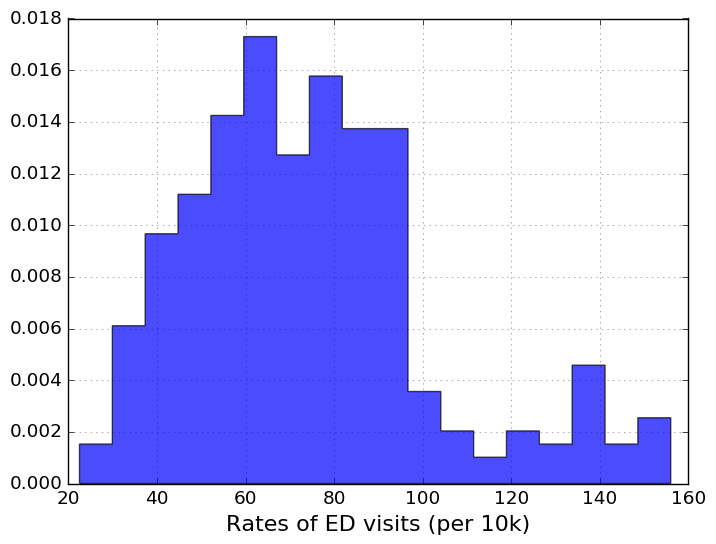

In [435]:
plt.hist(target,bins=18,normed=True,histtype='stepfilled',alpha=0.7)
plt.xlabel('Rates of ED visits (per 10k)')

In [437]:
feats_df= data_df.iloc[:,3:]

In [438]:
feats_df.head()

,Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,AQI 90th Percentile,AQI Median,# Days CO,# Days NO2,# Days O3,...,Adult smokers (%),Second-hand smoke (%),Adult obese (%),Unemployment (%),Medicare (%),Medi-Cal (%),Private (%),Other (%),Radon Zone,Population near busy roads (%)
0,0.602740,0.367123,0.030137,0.000000,0.0,74.0,44.0,0.0,0.043836,0.372603,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7
1,0.715847,0.273224,0.008197,0.002732,0.0,64.0,41.0,0.0,0.040984,0.483607,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7
2,0.517808,0.460274,0.021918,0.000000,0.0,79.0,50.0,0.0,0.030137,0.210959,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7
3,0.673973,0.298630,0.027397,0.000000,0.0,69.0,43.0,0.0,0.076712,0.416438,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7
4,0.586301,0.380822,0.032877,0.000000,0.0,76.0,46.0,0.0,0.032877,0.482192,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7


In [439]:
feats_df.shape

(265, 46)

265 data points for 46 features

In [440]:
feats_df.to_csv('temp_feats.csv',index=False)

target_df.to_csv('temp_target.csv',header=True,index=False)